In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json

In [2]:
data = {}
paramsNameList = []

batchNames = ['v1_batch0', 'v1_batch1', 'v1_batch2', 'v1_batch3'] # frac_Th_S1 - [0, 0.1 , 0.5, 1.0]
number = 0
for batchName in batchNames:  
    number = number + 1  

    with open(batchName + '/' + batchName + '_batch.json', 'r') as f:
            batchInfo = json.load(f) 

    params = batchInfo['batch']['params']       
    for name in params:
        print(name['label'])
        print(name['values'])

    frac_Th_S1_ = params[0]['values']

    for p1 in range(np.size(frac_Th_S1_)):
        paramsName  = 'frac_Th_S1_' + str(frac_Th_S1_[p1])
        paramsNameList.append(paramsName)
        with open(batchName + '/' + batchName + '_' + str(p1) + '.json', 'r') as f:
            data[paramsName] = json.load(f) 

frac_Th_S1
[0.0]
frac_Th_S1
[0.1]
frac_Th_S1
[0.5]
frac_Th_S1
[1.0]


In [48]:
popNumber = np.linspace(1, 55, 55)
popParamLabels = list(data[paramsName]['simData']['popRates'])
Epops = ['L23_PC', 'L4_PC', 'L4_SS', 'L4_SP', 
             'L5_TTPC1', 'L5_TTPC2', 'L5_STPC', 'L5_UTPC',
             'L6_TPC_L1', 'L6_TPC_L4', 'L6_BPC', 'L6_IPC', 'L6_UTPC']

thalamicpops = ['ss_RTN_o', 'ss_RTN_m', 'ss_RTN_i', 'VPL_sTC', 'VPM_sTC', 'POm_sTC_s1']

Ipops = []
for popName in popParamLabels:
    if popName not in Epops and popName not in thalamicpops:
        Ipops.append(popName)

In [61]:
#------------------------------------------------------------------------------  
# Load 55 Morphological Names and Cell pop numbers -> L1:6 L23:10 L4:12 L5:13 L6:14
# Load 207 Morpho-electrical Names used to import the cells from 'cell_data/' -> L1:14 L23:43 L4:46 L5:52 L6:52
# Create [Morphological,Electrical] = number of cell metype in the sub-pop
with open('S1-cells-distributions-Mouse.txt') as mtype_file:
	mtype_content = mtype_file.read()       

popNumber = {}
cellNumber = {} 
popLabel = {} 
cellParamLabels = []
popParamLabels2 = []
for line in mtype_content.split('\n')[:-1]:
	metype, mtype, etype, n, m = line.split()
	cellNumber[metype] = int(n)
	popLabel[metype] = mtype
	popNumber[mtype] = int(m)
	cellParamLabels.append(metype)
	if mtype not in popParamLabels2:
		popParamLabels2.append(mtype)

popNameName = {}
for mtype in popParamLabels:
    popNameName[mtype] = []
for line in mtype_content.split('\n')[:-1]:
	metype, mtype, etype, n, m = line.split()
	popNameName[mtype].append(metype)
    
#------------------------------------------------------------------------------  
# Thalamic Cells

thalamicpops = ['ss_RTN_o', 'ss_RTN_m', 'ss_RTN_i', 'VPL_sTC', 'VPM_sTC', 'POm_sTC_s1']

cellNumber['ss_RTN_o'] = 382
cellNumber['ss_RTN_m'] = 382
cellNumber['ss_RTN_i'] = 765
cellNumber['VPL_sTC'] = 656
cellNumber['VPM_sTC'] = 839
cellNumber['POm_sTC_s1'] = 685


for mtype in thalamicpops: # No diversity for while
	metype = mtype
	popLabel[metype] = mtype
	cellParamLabels.append(metype)
	popParamLabels2.append(mtype)
    
	popNumber[mtype] = cellNumber[metype]
	popNameName[mtype].append(metype)

In [50]:
recordCells = []
cellNameName = {}
for metype in cellParamLabels:
    cellNameName[metype] = []

cellNumberLabel = 0 
for metype in cellParamLabels:
    if cellNumber[metype] < 5:
        for numberME in range(cellNumber[metype]):
            recordCells.append(cellNumberLabel+numberME)
            cellNameName[metype].append('cell_' + str(cellNumberLabel+numberME))
    else:
        for numberME in range(5):
            recordCells.append(cellNumberLabel+numberME)
            cellNameName[metype].append('cell_' + str(cellNumberLabel+numberME))
                         
    cellNumberLabel = cellNumberLabel + cellNumber[metype]

# cellNameName = {}

# number = 0
# for cellName in list(data[paramsName]['simData']['V_soma']):
#     cellNameName[popParamLabels[number]] = cellName
#     number = number + 1

In [51]:
paramsNameList

['frac_Th_S1_0.0', 'frac_Th_S1_0.1', 'frac_Th_S1_0.5', 'frac_Th_S1_1.0']

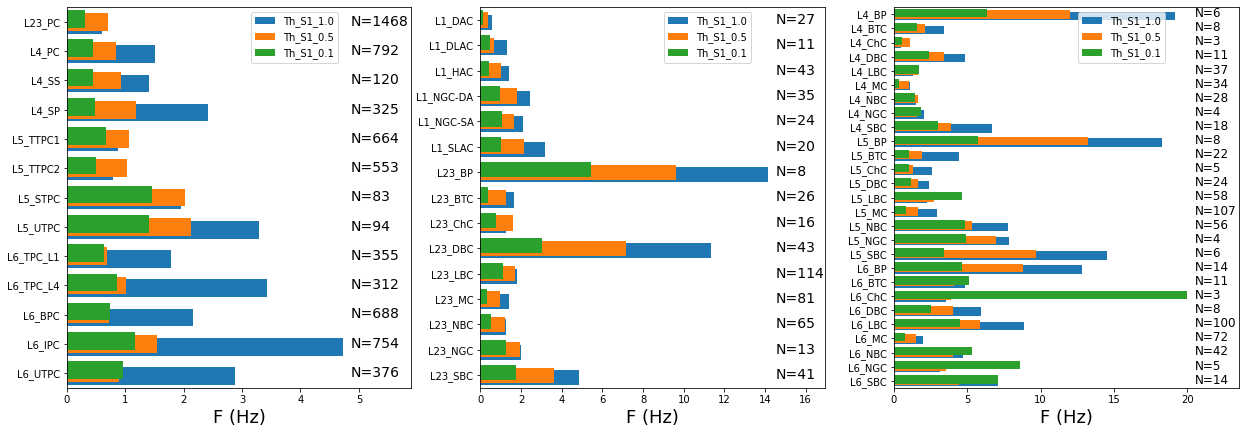

In [28]:
paramsNameListtocompare = [paramsNameList[2], paramsNameList[1], paramsNameList[0]]
def compare3FR(paramsNameListtocompare):
    plt.figure(figsize=(21,7))
    widths = 0.6
    plt.subplot(1, 3, 1) 
    number = 0
    for paramsName in paramsNameListtocompare:
        popRates = []
        popNames = []
        number2 = 0
        for popName in Epops:
            popRates.append(data[paramsName]['simData']['popRates'][popName])
            popNames.append(popName)
            if paramsName == paramsNameListtocompare[0]:
                plt.text(4.85, number2 + 0.13, 'N=' + str(popNumber[popName]), fontsize=14)
                number2 = number2 + 1
        ind = np.arange(len(popNames))
        plt.barh(ind+0.1-0.1*number,popRates, widths, label=paramsName[5:]) 
        number = number + 1

    plt.ylim(12.5,-0.5)
    plt.xlim(0,5.9)
    plt.xlabel('F (Hz)', fontsize=18)
    plt.yticks(ind, popNames, fontsize=10)
    plt.legend(loc='upper right', bbox_to_anchor=(0.8, 1.0))
    #----------------------------------------------------------------------------------
    plt.subplot(1, 3, 2)  
    number = 0
    for paramsName in paramsNameListtocompare:   
        popRates = []
        popNames = []
        number2 = 0
        for popName in Ipops[0:15]:
            popRates.append(data[paramsName]['simData']['popRates'][popName])
            popNames.append(popName)
            if paramsName == paramsNameListtocompare[0]:
                plt.text(14.5, number2 + 0.15, 'N=' + str(popNumber[popName]), fontsize=14)
                number2 = number2 + 1
        ind = np.arange(len(popNames))
        plt.barh(ind+0.1-0.1*number,popRates, widths, label=paramsName[5:]) 
        number = number + 1

    plt.ylim(14.5,-0.5)
    plt.xlim(0,16.95)
    plt.xlabel('F (Hz)', fontsize=18)
    plt.yticks(ind, popNames, fontsize=10)
    plt.legend(loc='upper right', bbox_to_anchor=(0.8, 1.0))
    #----------------------------------------------------------------------------------
    plt.subplot(1, 3, 3)   
    number = 0
    for paramsName in paramsNameListtocompare:    
        popRates = []
        popNames = []
        number2 = 0
        for popName in Ipops[15:]:
            popRates.append(data[paramsName]['simData']['popRates'][popName])
            popNames.append(popName)
            if paramsName == paramsNameListtocompare[0]:
                plt.text(20.5, number2 + 0.2, 'N=' + str(popNumber[popName]), fontsize=12)  
                number2 = number2 + 1          
        ind = np.arange(len(popNames))
        plt.barh(ind+0.1-0.1*number,popRates, widths, label=paramsName[5:]) 
        number = number + 1

    plt.ylim(26.5,-0.5)
    plt.xlim(0,23.5)
    plt.xlabel('F (Hz)', fontsize=18)
    plt.yticks(ind, popNames, fontsize=10)
    plt.legend(loc='upper right', bbox_to_anchor=(0.8, 1.0))
    
    namefig = 'FR_' + batchName + '_' 
    for paramsName in paramsNameListtocompare:    
         namefig = namefig + paramsName[5:] + '_' 
    namefig = namefig + '.png'
    plt.savefig(namefig, facecolor = 'white', bbox_inches='tight' , dpi=300)
    
paramsNameListtocompare = [paramsNameList[3], paramsNameList[2], paramsNameList[1]]
compare3FR(paramsNameListtocompare)

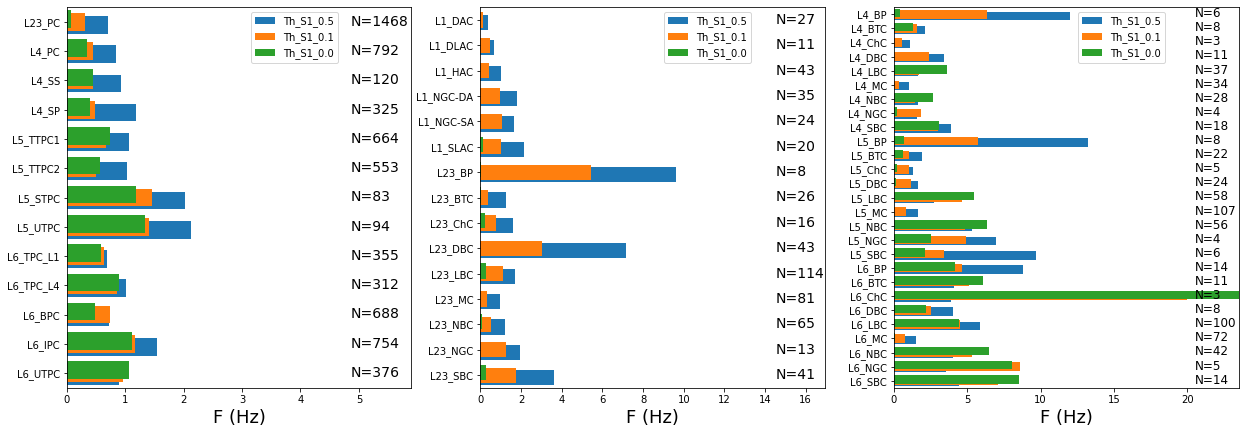

In [29]:
paramsNameListtocompare = [paramsNameList[2], paramsNameList[1], paramsNameList[0]]
compare3FR(paramsNameListtocompare)

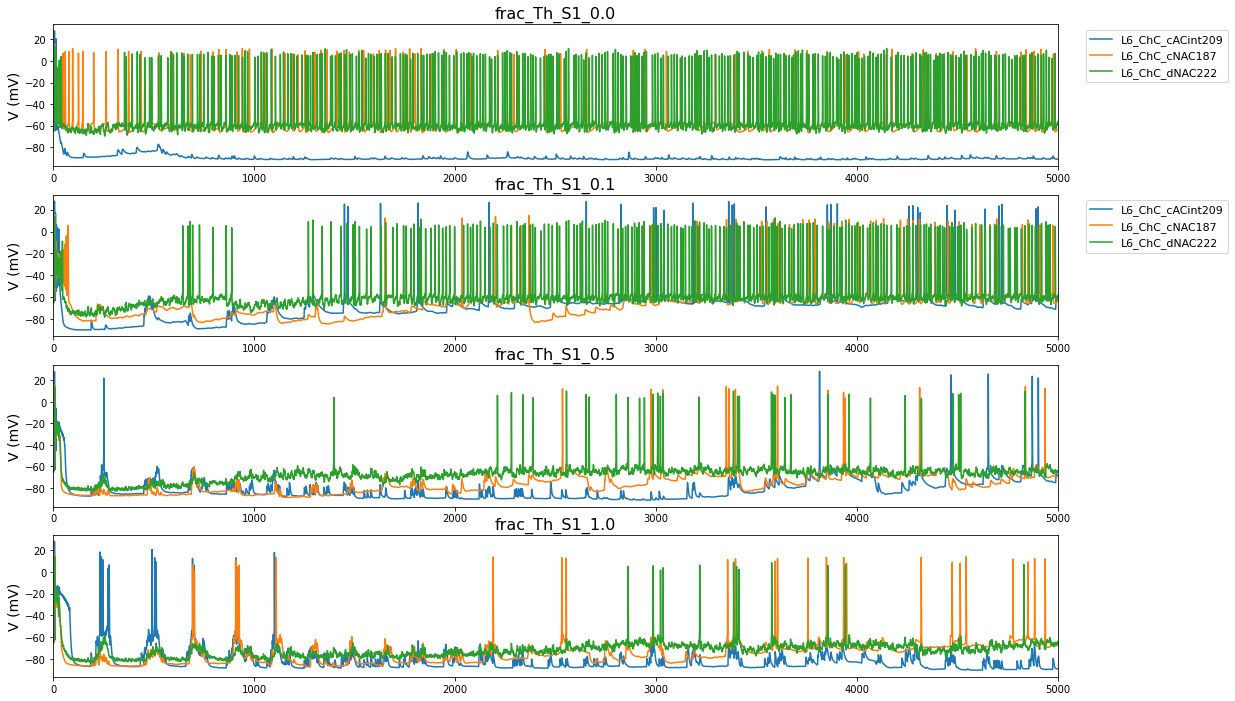

In [119]:
plt.figure(figsize=(18,12)) 
time = np.linspace(0, 5000, 50000)

popName = 'L6_ChC'

plt.subplot(4, 1, 1) 
for metype in popNameName[popName]:
    cellNames = cellNameName[metype]
    for cellName in cellNames:
        for paramsName in paramsNameList[0:1]:
            Vt = data[paramsName]['simData']['V_soma'][cellName]
            plt.plot(time, Vt, label=metype) 
        plt.legend(loc='upper right', bbox_to_anchor=(1.175, 1.0), fontsize=11)
        plt.ylabel('V (mV)', fontsize=14)
        plt.xlim(0, 5000)
        # plt.ylim(-80, -30)
        plt.title(paramsName, fontsize=16)    
        
plt.subplot(4, 1, 2) 
for metype in popNameName[popName]:
    cellNames = cellNameName[metype]
    for cellName in cellNames:
        for paramsName in paramsNameList[1:2]:
            Vt = data[paramsName]['simData']['V_soma'][cellName]
            plt.plot(time, Vt, label=metype) 
        plt.legend(loc='upper right', bbox_to_anchor=(1.175, 1.0), fontsize=11)
        plt.ylabel('V (mV)', fontsize=14)
        plt.xlim(0, 5000)
        # plt.ylim(-80, -30)
        plt.title(paramsName, fontsize=16)    

plt.subplot(4, 1, 3)  
for metype in popNameName[popName]:
    cellNames = cellNameName[metype]
    for cellName in cellNames:   
        for paramsName in paramsNameList[2:3]:
            Vt = data[paramsName]['simData']['V_soma'][cellName]
            plt.plot(time, Vt, label=metype) 
        plt.ylabel('V (mV)', fontsize=14)
        plt.xlim(0, 5000)
        # plt.ylim(-80, -30)
        plt.title(paramsName, fontsize=16)    

plt.subplot(4, 1, 4)  
for metype in popNameName[popName]:
    cellNames = cellNameName[metype]  
    for cellName in cellNames: 
        for paramsName in paramsNameList[3:4]:
            Vt = data[paramsName]['simData']['V_soma'][cellName]
            plt.plot(time, Vt, label=metype) 
        plt.ylabel('V (mV)', fontsize=14)
        plt.xlim(0, 5000)
        # plt.ylim(-80, -30)
        plt.title(paramsName, fontsize=16)    
        
plt.savefig('Vt_' + popName + '_' + batchName + '.png', facecolor = 'white', bbox_inches='tight' , dpi=300)

In [37]:
paramsNameList

['frac_Th_S1_0.0', 'frac_Th_S1_0.1', 'frac_Th_S1_0.5', 'frac_Th_S1_1.0']

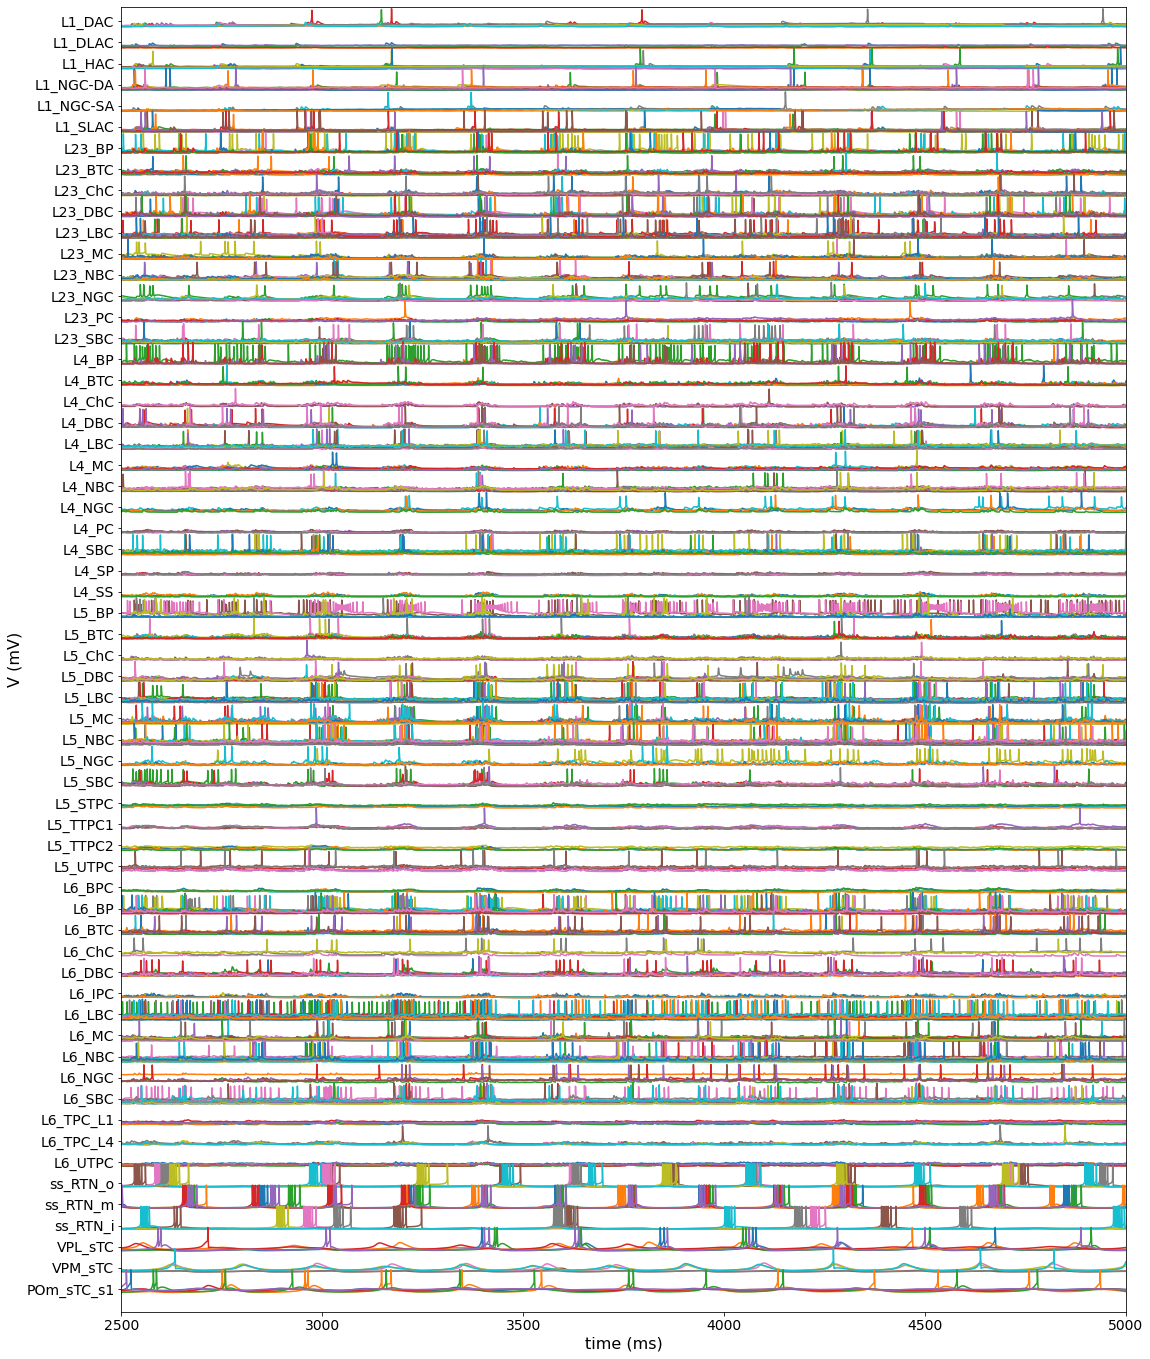

In [71]:
plt.figure(figsize=(18,24)) 
time = np.linspace(0, 5000, 50000)
plt.ylabel('V (mV)', fontsize=16)
plt.xlabel('time (ms)', fontsize=16)
plt.xlim(2500, 5000)
# plt.ylim(-80, -30)
plt.ylim(-7390,20)
plt.yticks(np.arange(-7260,60,120),popParamLabels2[::-1], fontsize=14)
plt.xticks(fontsize=14)

paramsName = paramsNameList[3]
number = 0
for popName in popParamLabels2:   
    for metype in popNameName[popName]:
        cellNames = cellNameName[metype]
        for cellName in cellNames:
            Vt = np.array(data[paramsName]['simData']['V_soma'][cellName])
            plt.plot(time, (Vt-number*120.0)) 
    number = number + 1

plt.savefig('Vt_after-transient_' + paramsName + '.png', facecolor = 'white', bbox_inches='tight' , dpi=300)

In [73]:
paramsName

'frac_Th_S1_1.0'

In [87]:
popID = {}
sum = 0
for mtype in popNumber.keys():
    popID[mtype] = sum
    sum += popNumber[mtype]
    
popID

{'L1_DAC': 0,
 'L1_DLAC': 27,
 'L1_HAC': 38,
 'L1_NGC-DA': 81,
 'L1_NGC-SA': 116,
 'L1_SLAC': 140,
 'L23_BP': 160,
 'L23_BTC': 168,
 'L23_ChC': 194,
 'L23_DBC': 210,
 'L23_LBC': 253,
 'L23_MC': 367,
 'L23_NBC': 448,
 'L23_NGC': 513,
 'L23_PC': 526,
 'L23_SBC': 1994,
 'L4_BP': 2035,
 'L4_BTC': 2041,
 'L4_ChC': 2049,
 'L4_DBC': 2052,
 'L4_LBC': 2063,
 'L4_MC': 2100,
 'L4_NBC': 2134,
 'L4_NGC': 2162,
 'L4_PC': 2166,
 'L4_SBC': 2958,
 'L4_SP': 2976,
 'L4_SS': 3301,
 'L5_BP': 3421,
 'L5_BTC': 3429,
 'L5_ChC': 3451,
 'L5_DBC': 3456,
 'L5_LBC': 3480,
 'L5_MC': 3538,
 'L5_NBC': 3645,
 'L5_NGC': 3701,
 'L5_SBC': 3705,
 'L5_STPC': 3711,
 'L5_TTPC1': 3794,
 'L5_TTPC2': 4458,
 'L5_UTPC': 5011,
 'L6_BPC': 5105,
 'L6_BP': 5793,
 'L6_BTC': 5807,
 'L6_ChC': 5818,
 'L6_DBC': 5821,
 'L6_IPC': 5829,
 'L6_LBC': 6583,
 'L6_MC': 6683,
 'L6_NBC': 6755,
 'L6_NGC': 6797,
 'L6_SBC': 6802,
 'L6_TPC_L1': 6816,
 'L6_TPC_L4': 7171,
 'L6_UTPC': 7483,
 'ss_RTN_o': 7859,
 'ss_RTN_m': 8241,
 'ss_RTN_i': 8623,
 'VPL_sTC

In [96]:
spkid = list(data[paramsName]['simData']['spkid'])
spkt = list(data[paramsName]['simData']['spkt'])
np.size(spkt)

229381

In [99]:
spkt[229381]

4999.949999962403

In [107]:
cellNameName['L5_TTPC2_cADpyr232']

['cell_4458', 'cell_4459', 'cell_4460', 'cell_4461', 'cell_4462']

In [113]:
popNumber['L5_TTPC2']

553

In [114]:
FRafter = []
for i in range(229381):
    if spkid[i] >= 4458 and spkid[i] < 5011 and spkid[i]>2000:
#         print('%.3f %.0f' % (spkt[i],spkid[i]))
        FRafter.append(spkt[i])
np.size(FRafter)/(3*(5011-4458))

1.3261000602772754

In [116]:
cellNameName['L6_TPC_L4_cADpyr231']

['cell_7171', 'cell_7172', 'cell_7173', 'cell_7174', 'cell_7175']

In [117]:
popNumber['L6_TPC_L4']

312

In [118]:
FRafter = []
for i in range(229381):
    if spkid[i] >= 7171 and spkid[i] < 7171+312 and spkid[i]>2000:
#         print('%.3f %.0f' % (spkt[i],spkid[i]))
        FRafter.append(spkt[i])
np.size(FRafter)/(3*(312))

5.721153846153846